2. Overnight long trade in SPY (S&P 500)
Buy at OPEN. 

[*********************100%***********************]  1 of 1 completed


Strategy Performance Summary
Total Trades: 3521
Average Gain per Trade: 0.07%
Win Ratio: 56.01%
Profit Factor: 1.16
Cumulative Return: 728.59%
CAGR: 16.33%
Time in Market: 99.97%
Risk-Adjusted Return: 0.16
Max Drawdown: -37.51%



/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/347050150.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['Equity'] = initial_equity * (1 + trades['Gain']).cumprod()
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/347050150.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['Drawdown'] = trades['Equity'] / trades['Equity'].cummax() - 1


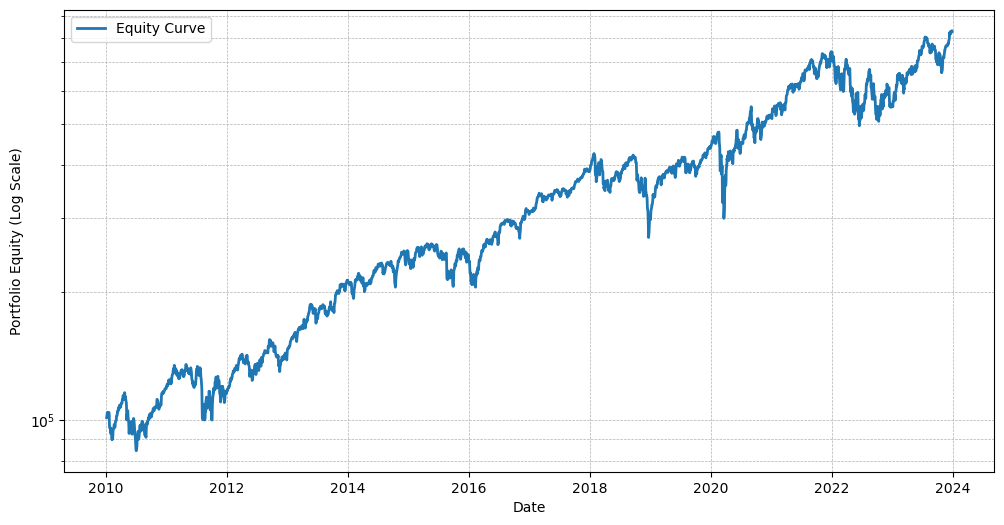

In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch historical data
data = yf.download('SPY', start='2010-01-01', end='2023-12-31')
data['Next_Close'] = data['Close'].shift(-1)

# Step 2: Calculate daily overnight gains
data['Gain'] = (data['Next_Close'] - data['Open']) / data['Open']

# Step 3: Filter trades
data['Trade'] = data['Gain'].notna()  # Only include days with valid next-day data
trades = data[data['Trade']]

# Step 4: Calculate cumulative returns
initial_equity = 100_000  # Start with $100,000
trades['Equity'] = initial_equity * (1 + trades['Gain']).cumprod()

# Step 5: Calculate performance metrics
total_trades = trades.shape[0]
average_gain = trades['Gain'].mean()
winners = trades[trades['Gain'] > 0]
losers = trades[trades['Gain'] <= 0]
win_ratio = len(winners) / total_trades
profit_factor = winners['Gain'].sum() / abs(losers['Gain'].sum())
cumulative_return = (1 + trades['Gain']).prod() - 1
years = (data.index[-1] - data.index[0]).days / 365.25
cagr = (1 + cumulative_return) ** (1 / years) - 1
time_in_market = total_trades / len(data)
risk_adjusted_return = cagr / time_in_market

# Calculate Max Drawdown
trades['Drawdown'] = trades['Equity'] / trades['Equity'].cummax() - 1
max_drawdown = trades['Drawdown'].min()

# Step 6: Display summary
print("\nStrategy Performance Summary")
print(f"Total Trades: {total_trades}")
print(f"Average Gain per Trade: {average_gain:.2%}")
print(f"Win Ratio: {win_ratio:.2%}")
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"CAGR: {cagr:.2%}")
print(f"Time in Market: {time_in_market:.2%}")
print(f"Risk-Adjusted Return: {risk_adjusted_return:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

# Step 7: Plot equity curve
plt.figure(figsize=(12, 6))
plt.plot(trades.index, trades['Equity'], label='Equity Curve', linewidth=2)
plt.yscale('log')  # Set log scale for equity
plt.xlabel('Date')
plt.ylabel('Portfolio Equity (Log Scale)')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


 EUR/USD Backtest

[*********************100%***********************]  1 of 1 completed


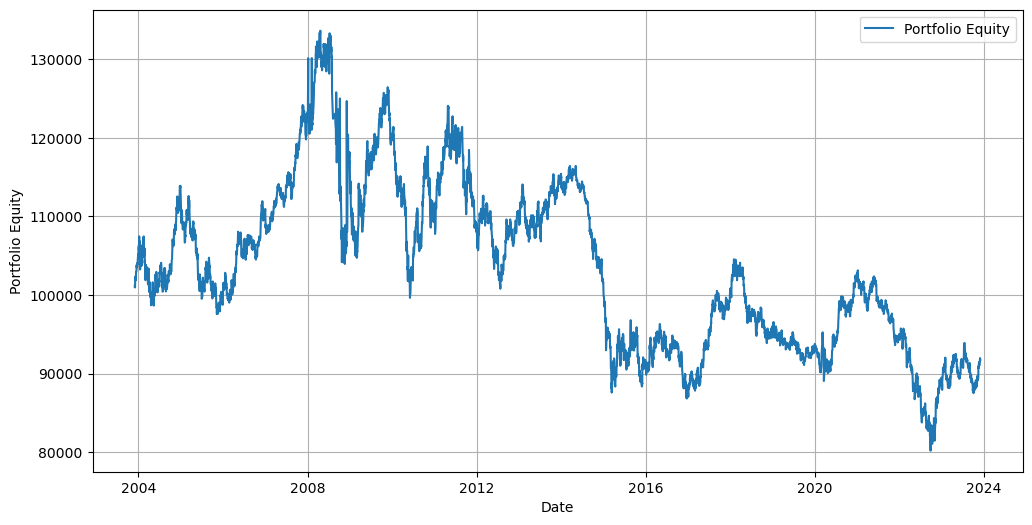

{'Total Trades': 5189, 'Average Return (%)': 0.0009136193794709021, 'Win Ratio (%)': 50.0, 'Max Drawdown (%)': -39.97870365012981, 'Final Portfolio Equity': 91714.85927890085}


In [27]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download EUR/USD data
data = yf.download('EURUSD=X', start='1990-01-01', end='2023-12-01')

# Simulate EUR/USD overnight strategy
def simulate_eurusd_strategy(data, initial_capital):
    data['Overnight Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
    data['Portfolio Equity'] = initial_capital * (1 + data['Overnight Return'].fillna(0)).cumprod()
    return data

# Main execution for EUR/USD
initial_capital = 100_000
data = simulate_eurusd_strategy(data, initial_capital)

# Plot equity curve
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio Equity'], label='Portfolio Equity')
plt.xlabel('Date')
plt.ylabel('Portfolio Equity')
plt.legend()
plt.grid(True)
plt.show()

# Performance Metrics
def calculate_performance(data):
    total_trades = len(data['Overnight Return'].dropna())
    avg_return = data['Overnight Return'].mean() * 100
    win_ratio = (data['Overnight Return'] > 0).mean() * 100
    max_drawdown = (data['Portfolio Equity'] / data['Portfolio Equity'].cummax() - 1).min() * 100
    final_equity = data['Portfolio Equity'].iloc[-1]
    return {
        'Total Trades': total_trades,
        'Average Return (%)': avg_return,
        'Win Ratio (%)': win_ratio,
        'Max Drawdown (%)': max_drawdown,
        'Final Portfolio Equity': final_equity
    }

metrics = calculate_performance(data)
print(metrics)


Hyperparameters

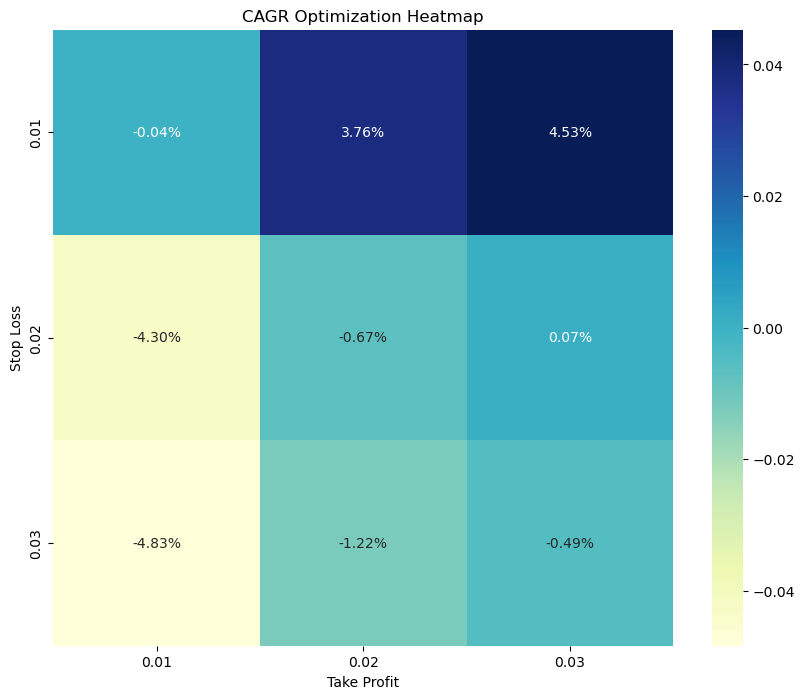

In [15]:
import numpy as np
from itertools import product
import seaborn as sns

# Function to simulate strategy with stop-loss and take-profit
def simulate_strategy_with_params(data, initial_capital, stop_loss, take_profit):
    data['Overnight Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
    cumulative_returns = [initial_capital]
    equity = initial_capital

    for i in range(len(data) - 1):
        overnight_return = (data['Close'].iloc[i + 1] - data['Close'].iloc[i]) / data['Close'].iloc[i]

        # Apply stop-loss and take-profit
        if overnight_return > take_profit:
            overnight_return = take_profit
        elif overnight_return < -stop_loss:
            overnight_return = -stop_loss

        equity *= (1 + overnight_return)
        cumulative_returns.append(equity)

    data['Portfolio Equity'] = cumulative_returns
    return data

# Hyperparameter optimization
def optimize_hyperparameters(data, initial_capital, stop_loss_values, take_profit_values):
    results = []
    for stop_loss, take_profit in product(stop_loss_values, take_profit_values):
        simulated_data = simulate_strategy_with_params(data.copy(), initial_capital, stop_loss, take_profit)
        cagr = ((simulated_data['Portfolio Equity'].iloc[-1] / initial_capital) ** 
                (1 / (len(simulated_data) / 252)) - 1)
        results.append({
            'Stop Loss': stop_loss,
            'Take Profit': take_profit,
            'CAGR': cagr
        })
    return pd.DataFrame(results)

# Execute optimization
stop_loss_values = [0.01, 0.02, 0.03]
take_profit_values = [0.01, 0.02, 0.03]
results = optimize_hyperparameters(data.copy(), initial_capital, stop_loss_values, take_profit_values)

# Plot heatmap
plt.figure(figsize=(10, 8))
pivot_table = results.pivot(index='Stop Loss', columns='Take Profit', values='CAGR')
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title('CAGR Optimization Heatmap')
plt.xlabel('Take Profit')
plt.ylabel('Stop Loss')
plt.show()


Robustness Test

Running In-Sample Tests...
Fetching data for EURUSD=X from 2015-01-01 to 2020-12-31...


/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9992383534837939' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity


Fetching data for GBPUSD=X from 2015-01-01 to 2020-12-31...


/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9999220366028586' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0016462045015424' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity


Fetching data for USDJPY=X from 2015-01-01 to 2020-12-31...
Fetching data for AUDUSD=X from 2015-01-01 to 2020-12-31...


/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0008177770178617' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.005782208063577' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity



Running Out-of-Sample Tests...
Fetching data for EURUSD=X from 2021-01-01 to 2023-10-31...
Fetching data for GBPUSD=X from 2021-01-01 to 2023-10-31...


/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.000818326467447' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0001259419966153' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity


Fetching data for USDJPY=X from 2021-01-01 to 2023-10-31...
Fetching data for AUDUSD=X from 2021-01-01 to 2023-10-31...


/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0012108226560332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i + 1], 'Cumulative Return'] = equity



Running Hourly Data Tests...
Fetching data for EURUSD=X from 2021-01-01 to 2023-10-31...



1 Failed download:
['EURUSD=X']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2021-01-01 -> 2023-10-31) (Yahoo error = "1h data not available for startTime=1609459200 and endTime=1698710400. The requested range must be within the last 730 days.")')


No data available for EURUSD=X.
Skipping EURUSD=X due to missing or empty data.
Fetching data for GBPUSD=X from 2021-01-01 to 2023-10-31...



1 Failed download:
['GBPUSD=X']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2021-01-01 -> 2023-10-31) (Yahoo error = "1h data not available for startTime=1609459200 and endTime=1698710400. The requested range must be within the last 730 days.")')


No data available for GBPUSD=X.
Skipping GBPUSD=X due to missing or empty data.
Fetching data for USDJPY=X from 2021-01-01 to 2023-10-31...



1 Failed download:
['USDJPY=X']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2021-01-01 -> 2023-10-31) (Yahoo error = "1h data not available for startTime=1609459200 and endTime=1698710400. The requested range must be within the last 730 days.")')


No data available for USDJPY=X.
Skipping USDJPY=X due to missing or empty data.
Fetching data for AUDUSD=X from 2021-01-01 to 2023-10-31...



1 Failed download:
['AUDUSD=X']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2021-01-01 -> 2023-10-31) (Yahoo error = "1h data not available for startTime=1609459200 and endTime=1698710400. The requested range must be within the last 730 days.")')
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['Portfolio Value'] = (1 + trades['Return (%)'] / 100).cumprod()
/var/folders/66/nrg4tbxn0zq_dxpyc2gwmd6c0000gn/T/ipykernel_79271/3485288057.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

No data available for AUDUSD=X.
Skipping AUDUSD=X due to missing or empty data.

========== Performance Summary ==========
In-Sample - EURUSD=X: {'Total Trades': 1561, 'Average Return (%)': 0.013258709762439763, 'Win Rate (%)': 49.583600256245994, 'Final Portfolio Value': 1.2075531170497587}
In-Sample - GBPUSD=X: {'Total Trades': 1561, 'Average Return (%)': 0.012013824882268818, 'Win Rate (%)': 49.071108263933375, 'Final Portfolio Value': 1.1788055573359952}
In-Sample - USDJPY=X: {'Total Trades': 1561, 'Average Return (%)': 0.005695135212383069, 'Win Rate (%)': 50.7367072389494, 'Final Portfolio Value': 1.0726167781545575}
In-Sample - AUDUSD=X: {'Total Trades': 1561, 'Average Return (%)': 0.017814935591890558, 'Win Rate (%)': 50.03203074951954, 'Final Portfolio Value': 1.2863374656746625}
Out-of-Sample - EURUSD=X: {'Total Trades': 736, 'Average Return (%)': -0.011287815736387954, 'Win Rate (%)': 48.369565217391305, 'Final Portfolio Value': 0.9126935147809727}
Out-of-Sample - GBPUSD=X: 

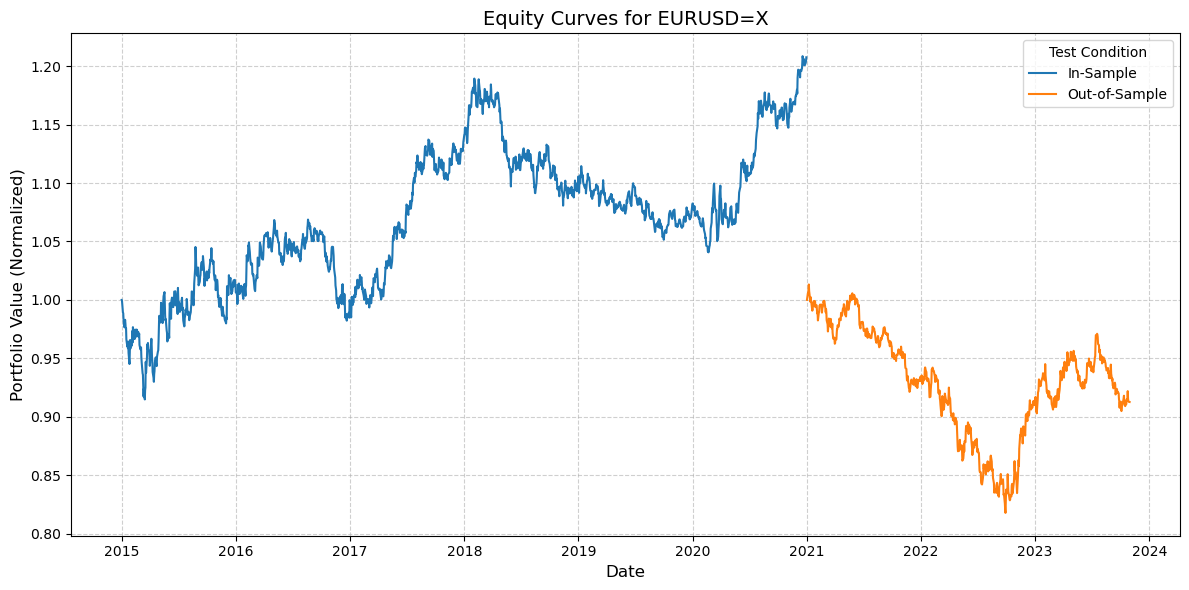

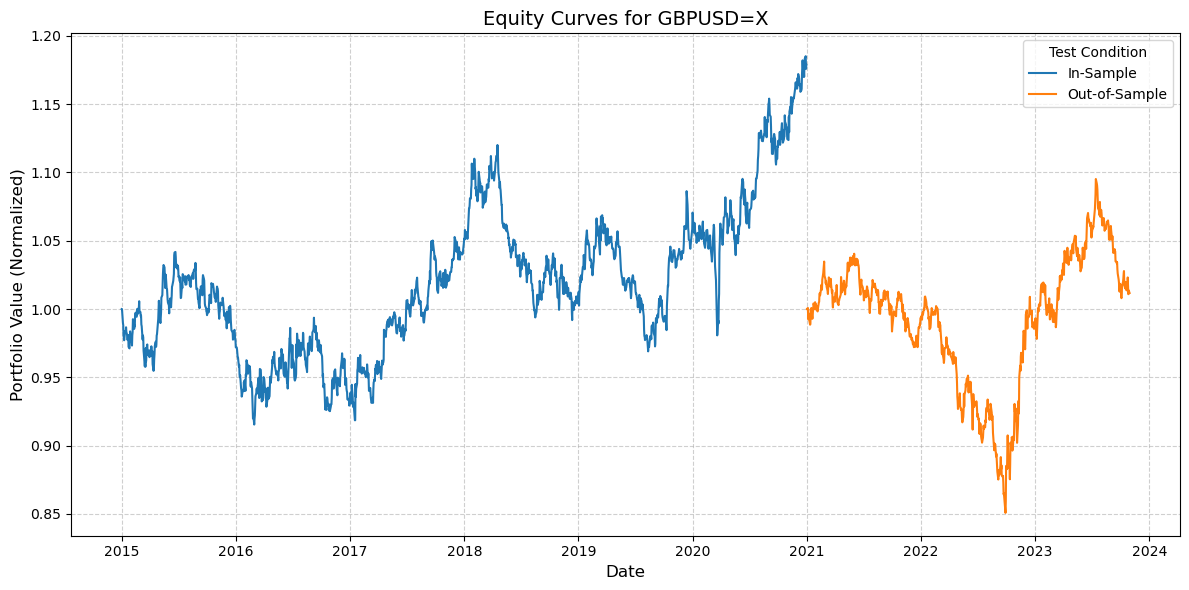

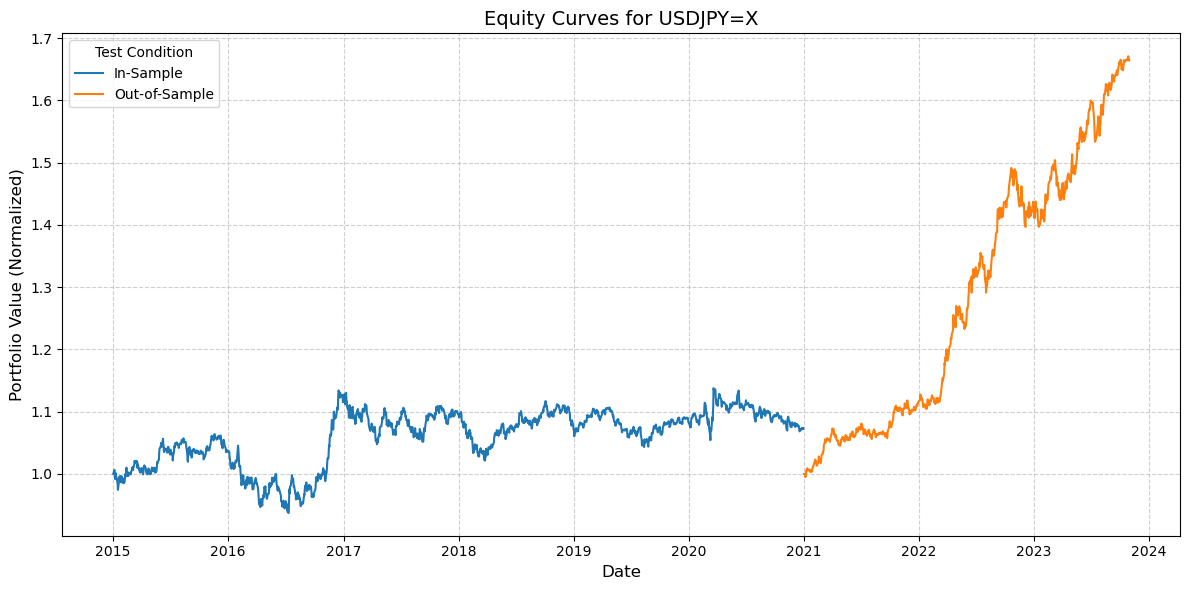

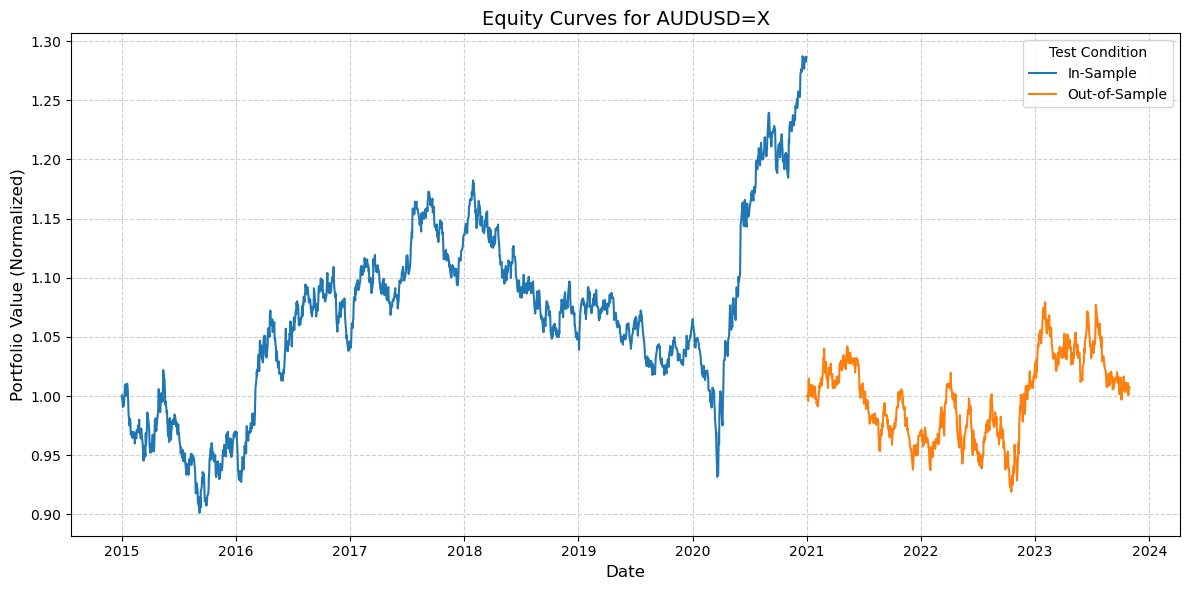

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define date ranges for in-sample and out-of-sample testing
in_sample_start = '2015-01-01'
in_sample_end = '2020-12-31'
out_sample_start = '2021-01-01'
out_sample_end = '2023-10-31'

# List of currency pairs for robustness testing
symbols = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'AUDUSD=X']

# Optimized parameters from hyperparameter optimization
best_stop_loss = 0.01
best_take_profit = 0.03

# Fetch data function
def fetch_data(symbol, start_date, end_date, interval='1d'):
    """Fetch historical data for a given symbol."""
    print(f"Fetching data for {symbol} from {start_date} to {end_date}...")
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval=interval, progress=False)
        if data.empty:
            print(f"No data available for {symbol}.")
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()

# Simulate strategy with given parameters
def simulate_strategy(data, stop_loss, take_profit):
    """Simulate the strategy using stop-loss and take-profit."""
    if data.empty:
        return pd.DataFrame(), pd.DataFrame()

    data['Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
    data['Cumulative Return'] = 1  # Initial portfolio value (normalized)
    trades = []

    equity = 1  # Start with normalized portfolio value
    for i in range(len(data) - 1):
        entry_price = data['Close'].iloc[i]
        exit_price = data['Close'].iloc[i + 1]
        trade_return = (exit_price - entry_price) / entry_price

        # Apply stop-loss and take-profit
        if trade_return > take_profit:
            trade_return = take_profit
        elif trade_return < -stop_loss:
            trade_return = -stop_loss

        # Update equity and log the trade
        equity *= (1 + trade_return)
        trades.append({
            'Entry Date': data.index[i],
            'Exit Date': data.index[i + 1],
            'Entry Price': entry_price,
            'Exit Price': exit_price,
            'Return (%)': trade_return * 100,
        })

        # Store equity in the data
        data.at[data.index[i + 1], 'Cumulative Return'] = equity

    return pd.DataFrame(trades), data

# Perform robustness testing
def robustness_test(symbols, stop_loss, take_profit, interval, sample_type):
    """Run robustness tests for multiple currency pairs."""
    all_trades = []
    equity_data = {}

    for symbol in symbols:
        # Define in-sample or out-of-sample periods
        start_date, end_date = (
            (in_sample_start, in_sample_end) if sample_type == "In-Sample" else (out_sample_start, out_sample_end)
        )
        data = fetch_data(symbol, start_date, end_date, interval)

        # Skip symbol if no data is available
        if data.empty:
            print(f"Skipping {symbol} due to missing or empty data.")
            continue

        # Simulate the strategy
        trades, data_with_equity = simulate_strategy(data, stop_loss, take_profit)

        # Append the trades to the list if any exist
        if not trades.empty:
            trades['Symbol'] = symbol
            trades['Sample'] = sample_type
            all_trades.append(trades)

        # Store equity data for plotting
        if not data_with_equity.empty:
            equity_data[symbol] = data_with_equity

    # Combine all trades into a single DataFrame
    return pd.concat(all_trades, ignore_index=True) if all_trades else pd.DataFrame(), equity_data

# Calculate performance metrics
def calculate_performance(trades):
    """Calculate performance metrics from trades."""
    if trades.empty:
        return {
            "Total Trades": 0,
            "Average Return (%)": 0,
            "Win Rate (%)": 0,
            "Final Portfolio Value": 1,  # Start with normalized portfolio value
        }

    # Calculate portfolio value over time
    trades['Portfolio Value'] = (1 + trades['Return (%)'] / 100).cumprod()

    # Metrics
    total_trades = len(trades)
    avg_return = trades['Return (%)'].mean()
    win_rate = len(trades[trades['Return (%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    final_portfolio = trades['Portfolio Value'].iloc[-1]

    return {
        "Total Trades": total_trades,
        "Average Return (%)": avg_return,
        "Win Rate (%)": win_rate,
        "Final Portfolio Value": final_portfolio,
    }

# Plot equity curves for different test conditions
def plot_equity_curves(data_dict, symbol):
    """
    Plot equity curves for different test conditions.
    
    Parameters:
        data_dict (dict): A dictionary where keys are test conditions (e.g., 'In-Sample')
                          and values are DataFrames with 'Cumulative Return'.
        symbol (str): The currency pair being tested.
    """
    plt.figure(figsize=(12, 6))
    for condition, data in data_dict.items():
        if not data.empty:
            plt.plot(data.index, data['Cumulative Return'], label=condition)

    # Add title, labels, and legend
    plt.title(f"Equity Curves for {symbol}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Portfolio Value (Normalized)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title="Test Condition", fontsize=10)
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Run In-Sample Tests
    print("Running In-Sample Tests...")
    in_sample_trades, equity_in_sample = robustness_test(
        symbols, best_stop_loss, best_take_profit, interval='1d', sample_type="In-Sample"
    )

    # Run Out-of-Sample Tests
    print("\nRunning Out-of-Sample Tests...")
    out_sample_trades, equity_out_sample = robustness_test(
        symbols, best_stop_loss, best_take_profit, interval='1d', sample_type="Out-of-Sample"
    )

    # Run Hourly Data Tests
    print("\nRunning Hourly Data Tests...")
    hourly_trades, equity_hourly = robustness_test(
        symbols, best_stop_loss, best_take_profit, interval='1h', sample_type="Hourly"
    )

    # Display Performance Summaries
    print("\n========== Performance Summary ==========")
    for condition, trades in [("In-Sample", in_sample_trades), ("Out-of-Sample", out_sample_trades), ("Hourly", hourly_trades)]:
        for symbol in symbols:
            symbol_trades = trades[trades['Symbol'] == symbol] if not trades.empty else pd.DataFrame()
            metrics = calculate_performance(symbol_trades)
            print(f"{condition} - {symbol}: {metrics}")

    # Plot equity curves for each symbol
    for symbol in symbols:
        equity_data = {
            "In-Sample": equity_in_sample.get(symbol, pd.DataFrame()),
            "Out-of-Sample": equity_out_sample.get(symbol, pd.DataFrame()),
            "Hourly": equity_hourly.get(symbol, pd.DataFrame()),
        }
        plot_equity_curves(equity_data, symbol)
